# *Coffee Shop Sales - Global AI Hub | Veri Analizi*   
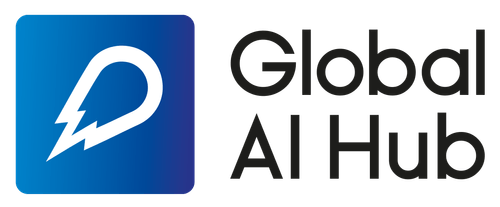
<br>


## *İçerik:* 
### *1. [Verinin Hazırlanması](#1) <br> 2. [Veriye İlk Bakış](#2) <br> 3. [Eksik Verileri İnceleyelim](#3) <br> 4. [Filtreleme](#4) <br> 5. [Kategorik Değişken Analizi](#5) <br> 6. [Feature Engineering](#6)*

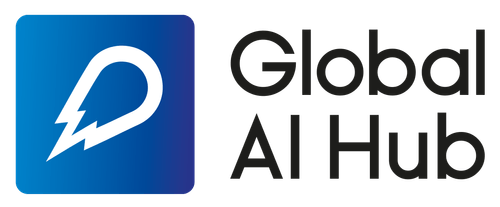

<a id="1"></a> <br>
## *1. Verinin Hazırlanması*


#### *Kullanılan veri seti*
##### *Coffee Shop Sales:   https://www.kaggle.com/datasets/keremkarayaz/coffee-shop-sales/data*


In [313]:
# Gerekli kütüphaneleri yükleyelim
import numpy as np      # NumPy kütüphanesi
import pandas as pd     # Pandas Kütüphanesi


# Görselleştirme için gerekli kütüphaneleri yükleyelim
import matplotlib.pyplot as plt   
import seaborn as sns

In [314]:
# Veri setini projemize dahil edelim
df_ = pd.read_excel("/kaggle/input/coffee-shop-sales/Coffee Shop Sales.xlsx")
df = df_.copy()         # veri setimizi kopyalayalım.

In [315]:
# Veri setinde rastgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.01) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing


df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

#### *dataframe'i çağırıp, veri hakkında bilgi genel bilgi edinelim.* 

In [316]:
df 

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,NaN,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453.0,2023-06-30,20:25:10,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino


<a id="2"></a> <br>
## *2. Veriye İlk Bakış*

#### *`.head()` ile baştan 4 değeri getirelim - default değeri 5'tir.*

In [317]:
# baştan 4 değeri getirelim - default değeri 5'tir
df.head(4)      

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,NaN,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm


#### *`.tail()` ile sondan 3 değeri getirelim - default değeri 5'tir.*

In [318]:
df.tail(3)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456.0,2023-06-30,20:57:19,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup


#### *`.shape` ile satır ve sütun sayısını getirelim. -> (satır, sütun)*

In [319]:
df.shape

(149116, 11)

#### *`.index` bilgilerini getirelim.*

In [320]:
df.index

RangeIndex(start=0, stop=149116, step=1)

#### *`.dtypes` ile veri setindeki değişkenleri ve değişken tiplerini görüntüleyelim.*

In [321]:
df.dtypes

transaction_id             float64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty            float64
store_id                   float64
store_location              object
product_id                 float64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

#### *`.info()` ile veri hakkında daha detaylı bilgileri getirelim.*

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    144681 non-null  float64       
 1   transaction_date  144768 non-null  datetime64[ns]
 2   transaction_time  144665 non-null  object        
 3   transaction_qty   144780 non-null  float64       
 4   store_id          144712 non-null  float64       
 5   store_location    144716 non-null  object        
 6   product_id        144676 non-null  float64       
 7   unit_price        144677 non-null  float64       
 8   product_category  144662 non-null  object        
 9   product_type      144702 non-null  object        
 10  product_detail    144726 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 12.5+ MB


#### *`.value_counts()` ile bir sütunun benzersiz değerlerin sayısını hesaplayalım.*

In [323]:
df["transaction_date"].value_counts().sum()

144768

#### *`.columns` ile verideki değişkenlerin sadece isimlerini getirelim.*

In [324]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')

#### *`.sample()` veri içerisindeki 2 satırı rastgele görüntüleyelim. -> default değeri 1*

In [325]:
df.sample(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
116884,117146.0,2023-06-03,16:31:06,1.0,8.0,Hell's Kitchen,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
145861,146198.0,NaT,18:50:38,1.0,3.0,Astoria,55.0,4.0,Tea,Brewed Chai tea,Morning Sunrise Chai Lg


#### *`.rename()` ile dataframe üzerinde columnları yeniden isimlendirme yapalım.*

In [326]:
df = df.rename(columns={"transaction_qty":"transaction_quantity"})

#### *Veri setinin çerçevesindeki sütunları veri türlerine göre ayıralım.* <br>
#### *Kategorik sütunları cat_cols listesine, sayısal sütunları num_cols listesine yerleştirelim.*

In [327]:
cat_cols = []
num_cols = []
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool", "datetime64[ns]"]]
num_cols = [col for col in df.columns if df[col].dtypes in ["int64","float64"]]

In [328]:
cat_cols, num_cols

(['transaction_date',
  'transaction_time',
  'store_location',
  'product_category',
  'product_type',
  'product_detail'],
 ['transaction_id',
  'transaction_quantity',
  'store_id',
  'product_id',
  'unit_price'])

#### *`astype()` fonksiyonu, bir Pandas DataFrame veya Series'deki veri tiplerini dönüştürmek için kullanılır.*
#### *Bu fonksiyon, bir sütunun veya tüm veri çerçevesinin veri tipini değiştirmek istediğinizde oldukça kullanışlıdır.*

In [329]:
# Burada transaction_date sütunun veri tipini object olarak değiştirdik.

df["transaction_date"] = df["transaction_date"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transaction_id        144681 non-null  float64
 1   transaction_date      149116 non-null  object 
 2   transaction_time      144665 non-null  object 
 3   transaction_quantity  144780 non-null  float64
 4   store_id              144712 non-null  float64
 5   store_location        144716 non-null  object 
 6   product_id            144676 non-null  float64
 7   unit_price            144677 non-null  float64
 8   product_category      144662 non-null  object 
 9   product_type          144702 non-null  object 
 10  product_detail        144726 non-null  object 
dtypes: float64(5), object(6)
memory usage: 12.5+ MB


#### *`.describe()`  ile veri setinin betimsel istatistiklerine ulaşılır.*

In [330]:
df.describe().T    # .T transpozu'nun almamızı sağlar.

,count,mean,std,min,25%,50%,75%,max
transaction_id,144681.0,74718.200842,43161.209142,1.0,37303.0,74678.0,112100.00,149456.0
transaction_quantity,144780.0,1.438196,0.542618,1.0,1.0,1.0,2.00,8.0
store_id,144712.0,5.342031,2.073947,3.0,3.0,5.0,8.00,8.0
product_id,144676.0,47.930839,17.933558,1.0,34.0,47.0,60.00,87.0
unit_price,144677.0,3.382666,2.657878,0.8,2.5,3.0,3.75,45.0


#### *`.describe(include='object)` string formatındaki sütunlara dair istatistiksel bilgilere erişmek için kullanıyoruz*

In [331]:
df.describe(include='object')

,transaction_date,transaction_time,store_location,product_category,product_type,product_detail
count,149116,144665,144716,144662,144702,144726
unique,182,25715,3,9,29,80
top,NaT,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,4348,40,49209,56713,16663,2989


<a id="3"><a> <br>
## *3. Eksik Verileri İnceleyelim*


#### *Eksik veri analizi, bir veri kümesinde bulunan boş ya da eksik değerlerin incelenmesi ve bu durumun veri analizi sürecine etkilerinin değerlendirilmesini amaçlar. Eksik verilerin kaynağını anlamak, hangi yöntemin uygulanacağını belirlemek açısından kritik öneme sahiptir.*  <br>

#### *Bazı durumlarda eksik veriler, istatistiksel yöntemlerle doldurularak (örneğin ortalama, medyan, mod veya regresyon yöntemleriyle) tamamlanabilir. Ancak, eğer eksik verilerin sayısı fazla ve bu durum analiz sonuçlarını ciddi şekilde etkiliyorsa, bu veriler veri kümesinden çıkarılabilir. Hangi yöntemin seçileceği, eksik verilerin analizin doğruluğuna etkisi ve analizin amacına göre değişir.*


### *3.1 Eksik Verilerin Gözlemlenmesi*

In [332]:
# veride her bir değişkende bulunun eksik değerlerin sayısı
df.isnull().sum()

transaction_id          4435
transaction_date           0
transaction_time        4451
transaction_quantity    4336
store_id                4404
store_location          4400
product_id              4440
unit_price              4439
product_category        4454
product_type            4414
product_detail          4390
dtype: int64

In [333]:
# verideki eksik değerlerin toplam sayısı 

df.isnull().sum().sum()

44163

In [334]:
# veri setinde null olmayan toplam değerleri, null olan toplam değerileri yazdıralım ve her bir sütun için eksik veri oranlarını hesaplayalım.

null_olmayanlar = df.notnull().sum().sum()
null_olanlar = df.isnull().sum().sum()
null_oran = df.isnull().mean() * 100

print(f"Veri setindeki toplam {null_olmayanlar} adet eksik olmayan gözlem var.")
print(f"Veri setindeki toplam {null_olanlar} adet eksik gözlem var.")
print("Veri setindeki her bir sütun için eksik veri oranlarını inceleyelim: ")
print(null_oran)

#Eksik verilerin, her bir sütunda veya genel veri kümesindeki oranını incelemek

Veri setindeki toplam 1596113 adet eksik olmayan gözlem var.
Veri setindeki toplam 44163 adet eksik gözlem var.
Veri setindeki her bir sütun için eksik veri oranlarını inceleyelim: 
transaction_id          2.974195
transaction_date        0.000000
transaction_time        2.984924
transaction_quantity    2.907803
store_id                2.953405
store_location          2.950723
product_id              2.977548
unit_price              2.976877
product_category        2.986936
product_type            2.960112
product_detail          2.944017
dtype: float64


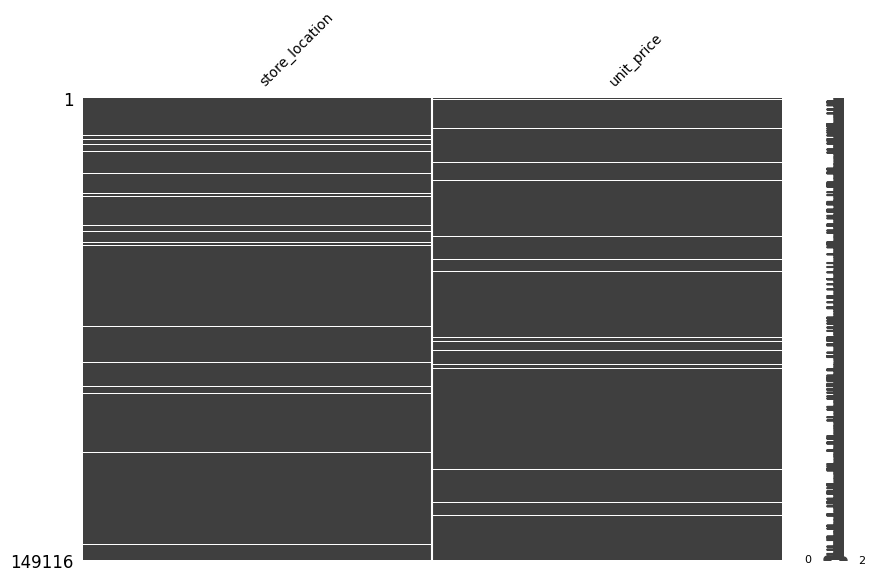

In [335]:
import missingno as msno

# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['store_location', 'unit_price']],
            figsize = (10, 6),
            fontsize = 10);

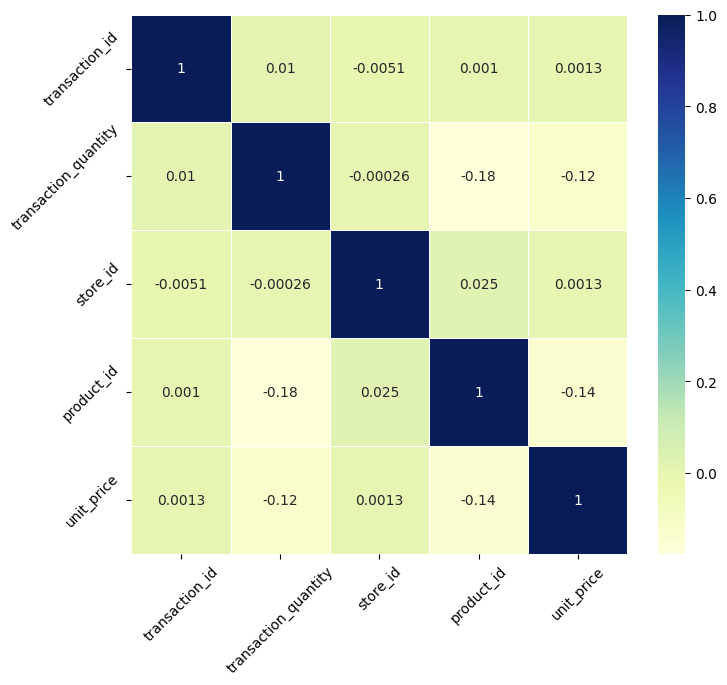

In [336]:
# Heatmap (correlation map) ile aralarındaki ilişkiyi ve birbirlerine olan etkilerini inceleyelim. 
# 0 ve 1 arasında değerler alır. 1'e yakınsa ilişki ihtimali o kadar yüksek. 0'a yakınsa birbirlerini etkileyen bir durum yoktur.

f, ax = plt.subplots(figsize =(8,7))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### *3.2 Eksik değerlerin silinmesi.*

In [337]:
# Eksik değer içeren satırları silme --> kalıcı olarak silmek için inplace=True veya tekrardan dataframe'e atama işlemi yapılmalıdır

df.dropna(inplace=False)[0:3]

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm


In [338]:
# Eksik değer içeren sütunları silme  --> kalıcı olarak silmek için inplace=True veya tekrardan dataframe'e atama işlemi yapılmalıdır

df.dropna(axis=1, inplace=False)[0:4]

,transaction_date
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01


In [339]:
df.isnull().sum().sum()

44163

In [340]:
# thresh kullanımı 
# En az 10 tane Null olmayan değer içeren satırları koru, diğerlerini sil
df_thresh_row = df.dropna(axis=0, thresh=10)

In [341]:
df_thresh_row

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,NaN,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453.0,2023-06-30,20:25:10,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino


In [342]:
df_thresh_row.isnull().sum().sum()

33581

In [343]:
# En az 144690 tane Null olmayan değer içeren sütunları koru, diğerlerini sil. 
df_thresh_col = df.dropna(axis=1, thresh=144690)

In [344]:
df_thresh_col           # gözlemlendiği üzere 11 sütunlu değişkenimizden sütunlardan bazıları silmiş bulunuyoruz.

,transaction_date,transaction_quantity,store_id,store_location,product_type,product_detail
0,2023-01-01,2.0,5.0,Lower Manhattan,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,2.0,5.0,Lower Manhattan,NaN,Spicy Eye Opener Chai Lg
2,2023-01-01,2.0,5.0,Lower Manhattan,Hot chocolate,Dark chocolate Lg
3,2023-01-01,1.0,5.0,Lower Manhattan,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,2.0,5.0,Lower Manhattan,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...
149111,2023-06-30,2.0,8.0,Hell's Kitchen,Brewed herbal tea,Peppermint Rg
149112,2023-06-30,2.0,8.0,Hell's Kitchen,Brewed Black tea,English Breakfast Lg
149113,2023-06-30,1.0,8.0,Hell's Kitchen,Brewed herbal tea,Peppermint Lg
149114,2023-06-30,1.0,8.0,Hell's Kitchen,Barista Espresso,Cappuccino


### *3.3 Eksik verileri doldurulması*

#### *Eksik verilerin doldurulması, veri analizi sürecinde önemli bir adımdır ve eksik değerlerin analizi olumsuz etkilemesini önlemek için kullanılır. Bu işlem, veri kümesinin bütünlüğünü koruyarak daha doğru ve güvenilir sonuçlar elde edilmesini sağlar. Doldurma işlemi, eksik değerlerin yerine istatistiksel yöntemlerle belirlenen değerlerin eklenmesiyle gerçekleştirilir. Örneğin, bir sütundaki eksik değerler için ortalama, medyan veya mod gibi özet istatistikler kullanılabilir.* 

In [345]:
# Doldurma işlemlerini gerçekleştirmek için veri setinin bir kopyasını oluşturalım.
df_fillna = df.copy()

df_fillna.head(3)

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,NaN,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [346]:
df_fillna.isnull().sum()

transaction_id          4435
transaction_date           0
transaction_time        4451
transaction_quantity    4336
store_id                4404
store_location          4400
product_id              4440
unit_price              4439
product_category        4454
product_type            4414
product_detail          4390
dtype: int64

#### 3.2.1 Sayısal Değişkenlerin Doldurulması

In [347]:
# Numeric bir değişkenin doldurulması
# Öncelikle doldurmak istediğimiz sütun olan unit_price'ın eksik değerlerinin toplam sayısına bakalım.
df_fillna["unit_price"].isnull().sum()

4439

In [348]:
# unit_price'taki eksik değerleri unit_price'ın ortalaması ile dolduralım.

df_fillna.fillna({"unit_price": df['unit_price'].mean()}, inplace=True)

In [349]:
# tekrardan unit_price'ın eksik değerlerinin toplamına bakalım. 
df_fillna["unit_price"].isnull().sum()

0

##### *Böylelikle unit_price sütunun eksik değerlerini unit_price'ın eksik değerlerinin ortalaması ile doldurmuş olduk*

In [350]:
# tüm numeric değişkenlerin döngü ile doldurulması

filled = num_cols[1:]

for col in filled:
      df_fillna[col] = df_fillna[col].fillna(df_fillna[col].mean())

In [351]:
df_fillna.isnull().sum()

transaction_id          4435
transaction_date           0
transaction_time        4451
transaction_quantity       0
store_id                   0
store_location          4400
product_id                 0
unit_price                 0
product_category        4454
product_type            4414
product_detail          4390
dtype: int64

##### *Buradaki sonuçtan yola çıkarak döngü yardımıyla tüm numerik değişkenlerin kendi ortalamalarıyla doldurulmuş olduğunu görüyoruz.*

#### 3.2.2 Kategorik Değişkenlerin Doldurulması

In [352]:
# Kategorik sütunu mode ile doldurma
df_fillna['product_category'] = df_fillna['product_category'].fillna(df_fillna['product_category'].mode()[0])

In [353]:
# tekrardan product_category'nin eksik değerlerinin toplamına bakalım. 
df_fillna["product_category"].isnull().sum()

0

##### *Böylelikle product_category sütunun eksik değerlerini mode ile doldurmuş olduk*

In [354]:
# Bir sütundaki NaN değerlerin tümünü "Missing Value" şeklinde doldurabiliriz.

df_fillna["product_detail"] = df_fillna["product_detail"].fillna("Missing Value")

In [355]:
# product_detail'de eksik değerlerin sayısını doldurduktan sonra kontrol ediyoruz.
df_fillna["product_detail"].isnull().sum()

0

In [356]:
# Missing Value olarak doldurulan değerleri başka bir dataframe'e atıyoruz
filled_rows = df_fillna[df_fillna["product_detail"] == "Missing Value"]

In [357]:
# doldurulan toplam eksik değerlerin sayısına bakıyoruz ve bu kadar değerin Missing Value yazarak doldurulmuş olduğunu görüyoruz.
filled_rows.value_counts().sum()

3853

In [358]:
# yukarıdaki işlemlerden sonra eksik değer olan değerleri kontrol ediyoruz.
df_fillna.isnull().sum()

transaction_id          4435
transaction_date           0
transaction_time        4451
transaction_quantity       0
store_id                   0
store_location          4400
product_id                 0
unit_price                 0
product_category           0
product_type            4414
product_detail             0
dtype: int64

#### *`ffill()` ile product_type sütununu önceki değer ile dolduralım.*

In [359]:
df_fillna["product_type"].isnull().sum()

4414

In [360]:
df_fillna[["product_type"]][0:20]

,product_type
0,Gourmet brewed coffee
1,NaN
2,Hot chocolate
3,Drip coffee
4,Brewed Chai tea
5,Scone
6,Drip coffee
7,Gourmet brewed coffee
8,Barista Espresso
9,Hot chocolate


In [361]:
# product_type sütununu kendisinden önceki sütunun değeri olan aynı değer ile dolduralım

df_fillna["product_type"] = df_fillna["product_type"].ffill()

In [362]:
df_fillna["product_type"].isnull().sum()    

0

#### *`bfill()` ile store_location sütununu sonraki değer ile dolduralım.*

In [363]:
df_fillna[["store_location"]][20:50]

,store_location
20,Hell's Kitchen
21,Lower Manhattan
22,Lower Manhattan
23,Hell's Kitchen
24,Hell's Kitchen
25,Lower Manhattan
26,Lower Manhattan
27,Lower Manhattan
28,Lower Manhattan
29,Hell's Kitchen


In [364]:
df_fillna["store_location"].isnull().sum()

4400

In [365]:
# store_location sütununu kendisinden sonraki sütunun değeri olan aynı değer ile dolduralım

df_fillna["store_location"] = df_fillna["store_location"].bfill()

In [366]:
df_fillna["store_location"].isnull().sum()

0

<a id="4"><a> <br>
## *4. Filtreleme*

#### *`loc` kullanarak filtreleme işlemleri*

In [367]:
# unit_price'ı 4'ten büyük olanların unit_price ve product_category bilgilerini seçerek koşullu filtreleme
df.loc[df["unit_price"] > 4, ["unit_price", "product_category"]]

,unit_price,product_category
2,4.50,Drinking Chocolate
8,4.25,NaN
18,4.50,Drinking Chocolate
19,4.75,Drinking Chocolate
42,4.50,Bakery
...,...,...
149069,4.25,Coffee
149075,4.50,Drinking Chocolate
149089,18.00,Coffee beans
149091,4.25,Coffee


In [368]:
# transaction_quantity 2'den küçük olan sütunların product_id ve product_type bilgilerini getirelim

df.loc[df['transaction_quantity'] < 2][['product_id', 'product_type']]

,product_id,product_type
3,22.0,Drip coffee
5,77.0,Scone
6,22.0,Drip coffee
8,39.0,Barista Espresso
10,56.0,Brewed Chai tea
...,...,...
149105,24.0,Drip coffee
149106,33.0,Gourmet brewed coffee
149108,70.0,Scone
149113,45.0,Brewed herbal tea


#### *`iloc` kullanarak filtreleme işlemleri*

In [369]:
# iloc kullanarak filtreleme yapalım
df.iloc[200:210, 7:10]

,unit_price,product_category,product_type
200,4.75,Drinking Chocolate,Hot chocolate
201,3.25,Bakery,Scone
202,2.55,Tea,Brewed Chai tea
203,3.50,Bakery,Pastry
204,NaN,Coffee,Gourmet brewed coffee
205,3.00,Coffee,Barista Espresso
206,3.00,Tea,Brewed Black tea
207,3.10,Tea,Brewed Chai tea
208,3.50,Bakery,Pastry
209,3.00,Tea,Brewed herbal tea


In [370]:
# Koşullu İndeksleme 

filtered_df = df[df["store_id"] == 8.0].iloc[:5]
filtered_df

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
17,18.0,2023-01-01,08:00:18,1.0,8.0,Hell's Kitchen,42.0,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
18,19.0,2023-01-01,08:00:39,2.0,8.0,Hell's Kitchen,59.0,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
19,20.0,2023-01-01,08:11:45,1.0,8.0,Hell's Kitchen,61.0,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg
20,21.0,2023-01-01,08:17:27,2.0,8.0,Hell's Kitchen,33.0,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg
23,24.0,2023-01-01,08:29:38,1.0,8.0,Hell's Kitchen,56.0,2.55,Tea,Brewed Chai tea,Spicy Eye Opener Chai Rg


#### *`.query()` ile sorgulama işlemleri*

In [371]:
# tranaction_id'si 5.0 olan ve product_category'si Tea olan ürünü query yolula sorgulama
filtered_df2 = df.query("transaction_id == 5.0 and product_category == 'Tea'")
filtered_df2


,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


#### *`groupby()` kullanımı*

In [372]:
# product_category sütununa göre gruplandırma yaparak, her bir kategori için unit_price sütununun toplamını (sum) ve ortalamasını (mean) hesaplar.

ortalama_fiyat = df.groupby("product_category")["unit_price"].agg(["sum", "mean"])
ortalama_fiyat

,sum,mean
product_category,,
Bakery,76261.11,3.551985
Branded,12413.00,17.732857
Coffee,166484.60,3.023529
Coffee beans,34528.10,21.015277
Drinking Chocolate,44785.75,4.149903
Flavours,5096.80,0.800000
Loose Tea,10601.90,9.267395
Packaged Chocolate,4146.87,9.034575
Tea,120363.60,2.817632


In [373]:
# product_type ve store_location sütunlarına göre veriyi gruplandırarak, transaction_quantity ve unit_price sütunları için toplam (sum), ortalama (mean), maksimum (max) ve minimum (min) değerleri hesaplar.

grup_toplam = df.groupby(["product_type", "store_location"])[["transaction_quantity", "unit_price"]].agg(["sum", "mean", "max", "min"])
grup_toplam

transaction_quantity                      \
                                                  sum      mean  max  min   
product_type     store_location                                             
Barista Espresso Astoria                       6728.0  1.489484  2.0  1.0   
                 Hell's Kitchen                8295.0  1.469702  2.0  1.0   
                 Lower Manhattan               7812.0  1.604107  4.0  1.0   
Biscotti         Astoria                       1798.0  1.039306  2.0  1.0   
                 Hell's Kitchen                1691.0  1.001777  2.0  1.0   
...                                               ...       ...  ...  ...   
Scone            Hell's Kitchen                3214.0  1.015803  2.0  1.0   
                 Lower Manhattan               3352.0  1.040348  3.0  1.0   
Sugar free syrup Astoria                        515.0  1.479885  2.0  1.0   
                 Hell's Kitchen                 814.0  1.485401  2.0  1.0   
                 Lower Manhattan               1309.0  1.736074  4.0  1.0   

                                 unit_price                        
                                        sum      mean   max   min  
product_type     store_location                                    
Barista Espresso Astoria           17190.50  3.804050  4.25  3.00  
                 Hell's Kitchen    20115.05  3.550132  4.25  2.10  
                 Lower Manhattan   17597.90  3.638937  4.25  2.10  
Biscotti         Astoria            5867.00  3.415017  3.50  3.25  
                 Hell's Kitchen     5849.75  3.410933  3.50  3.25  
...                                     ...       ...   ...   ...  
Scone            Hell's Kitchen    11367.10  3.580189  4.50  2.65  
                 Lower Manhattan   11292.51  3.497216  5.63  2.65  
Sugar free syrup Astoria             276.80  0.800000  0.80  0.80  
                 Hell's Kitchen      438.40  0.800000  0.80  0.80  
                 Lower Manhattan     607.20  0.800000  0.80  0.80  

[87 rows x 8 columns]

<a id="5"><a> <br>
## *5. Kategorik Değişken Analizi*

In [374]:
df_copy = df.copy()
df_copy.head(5)

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,NaN,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [375]:
df_copy["product_category"].value_counts()              # tek bir değeri kullanarak analiz edebiliriz

product_category
Coffee                56713
Tea                   44072
Bakery                22122
Drinking Chocolate    11126
Flavours               6566
Coffee beans           1690
Loose Tea              1175
Branded                 727
Packaged Chocolate      471
Name: count, dtype: int64

In [376]:
df_copy["store_location"].unique()  # store_location değişkeninin unique değerlerine erişmek istersek

array(['Lower Manhattan', nan, "Hell's Kitchen", 'Astoria'], dtype=object)

In [377]:
df_copy["store_location"].nunique()  # nunique toplamda kaç tane eşsiz değer var onun bilgisini verir

3

In [378]:
df_copy["product_category"].nunique()

9

#### *Yukarıda her bir sütun için bu adımları yapabiliriz ancak burada çok fazla sayıda değişken olduğunda bunları tek tek bulamayız. Bunun için bir cat_summary adında bir fonksiyon yazalım.*

In [379]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Oran (%)": dataframe[col_name].value_counts(normalize=True) * 100}))  
    print(f"Unique Değerler: {dataframe[col_name].unique()}")
    print(f"Eşsiz Değer Sayısı: {dataframe[col_name].nunique()}")
    print("######################################################")

cat_summary(df_copy, "product_category")

                    product_category   Oran (%)
product_category                               
Coffee                         56713  39.203799
Tea                            44072  30.465499
Bakery                         22122  15.292198
Drinking Chocolate             11126   7.691032
Flavours                        6566   4.538856
Coffee beans                    1690   1.168240
Loose Tea                       1175   0.812238
Branded                          727   0.502551
Packaged Chocolate               471   0.325587
Unique Değerler: ['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' nan 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']
Eşsiz Değer Sayısı: 9
######################################################


In [380]:
# oluşturduğumuz cat_summary fonksiyonu ile daha önce oluşturduğumuz cat_cols listemizi gezerek her bir sütunun hepsine uygulayalım.

for col in cat_cols:  # cat_cols'larda gez.
    cat_summary(df, col)  # bu fonksiyonu cat_cols'daki her bir değişkene uygula

                  transaction_date  Oran (%)
transaction_date                            
NaT                           4348  2.915851
2023-06-19                    1301  0.872475
2023-06-16                    1296  0.869122
2023-06-18                    1255  0.841627
2023-06-13                    1250  0.838274
...                            ...       ...
2023-01-22                     474  0.317873
2023-01-30                     460  0.308485
2023-01-28                     457  0.306473
2023-01-29                     443  0.297084
2023-01-31                     440  0.295072

[182 rows x 2 columns]
Unique Değerler: ['2023-01-01' 'NaT' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10'
 '2023-01-11' '2023-01-12' '2023-01-13' '2023-01-14' '2023-01-15'
 '2023-01-16' '2023-01-17' '2023-01-18' '2023-01-19' '2023-01-20'
 '2023-01-21' '2023-01-22' '2023-01-23' '2023-01-24' '2023-01-25'
 '2023-01-26' '2023-01-27' '2023-01-28

In [381]:
import numpy as np

# NaN değerleri doldur
df_copy["unit_price"] = df_copy["unit_price"].fillna(0)

# Sonsuz değerleri kontrol et ve 0 ile değiştir
df_copy["unit_price"] = df_copy["unit_price"].replace([np.inf, -np.inf], 0)

# Tam sayıya dönüştür
df_copy["unit_price"] = df_copy["unit_price"].astype(int)


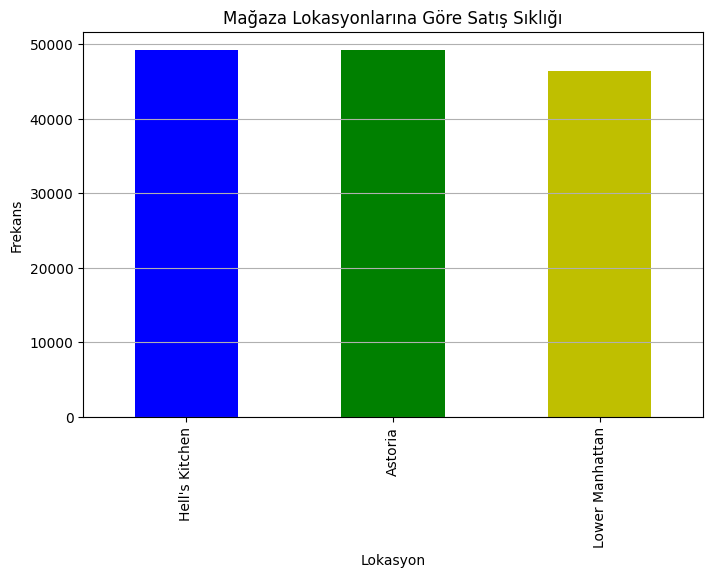

In [382]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.  --- barplot

plt.figure(figsize=(8,5))
df['store_location'].value_counts().plot.bar(color=["b","g","y"]);
plt.title("Mağaza Lokasyonlarına Göre Satış Sıklığı")
plt.xlabel("Lokasyon")
plt.ylabel("Frekans")
plt.grid(axis="y")


Text(0.5, 1.0, 'Ürün Kategorisi Adeti')

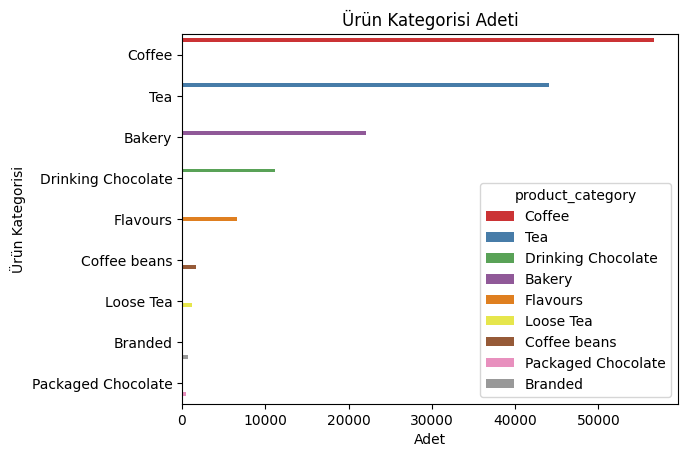

In [383]:
# Ürün Kategorisi adetlerini countplot ile görselleştirelim.

sns.countplot(data = df,
              y = "product_category",
              hue = "product_category",
              order = df["product_category"].value_counts().index,
              palette = "Set1");

plt.xlabel("Adet")
plt.ylabel("Ürün Kategorisi")
plt.title("Ürün Kategorisi Adeti")

Text(0.5, 1.0, 'Lokasyona Göre İşlem Miktarı')

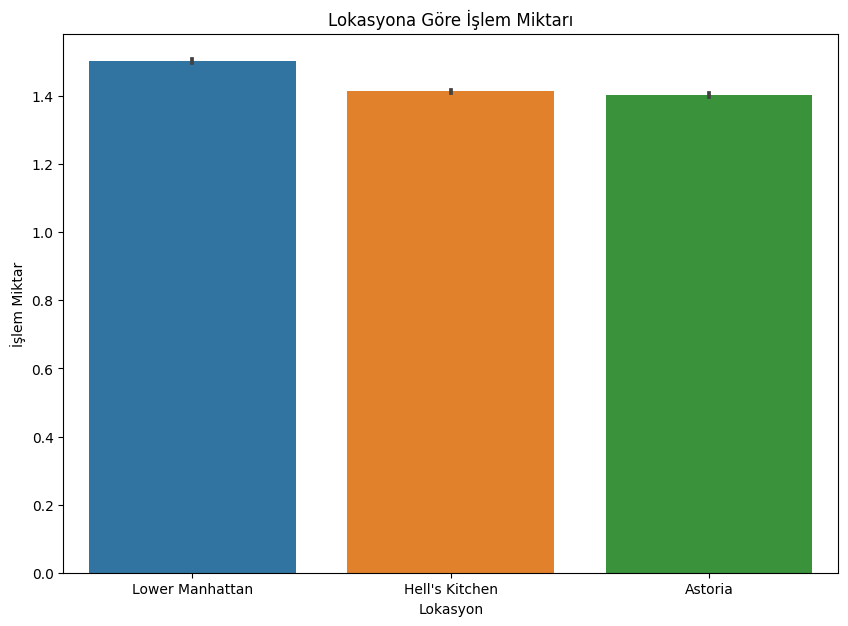

In [384]:
# Lokasyona göre yapılan işlem miktarını barplot ile görselleştirelim.

plt.figure(figsize = (10, 7))
sns.barplot(data = df_copy, x = "store_location", y = 'transaction_quantity')
plt.xlabel("Lokasyon")
plt.ylabel("İşlem Miktar")
plt.title("Lokasyona Göre İşlem Miktarı")

Text(0.5, 1.0, 'Ürün Çeşitlerinin Birim Fiyatı')

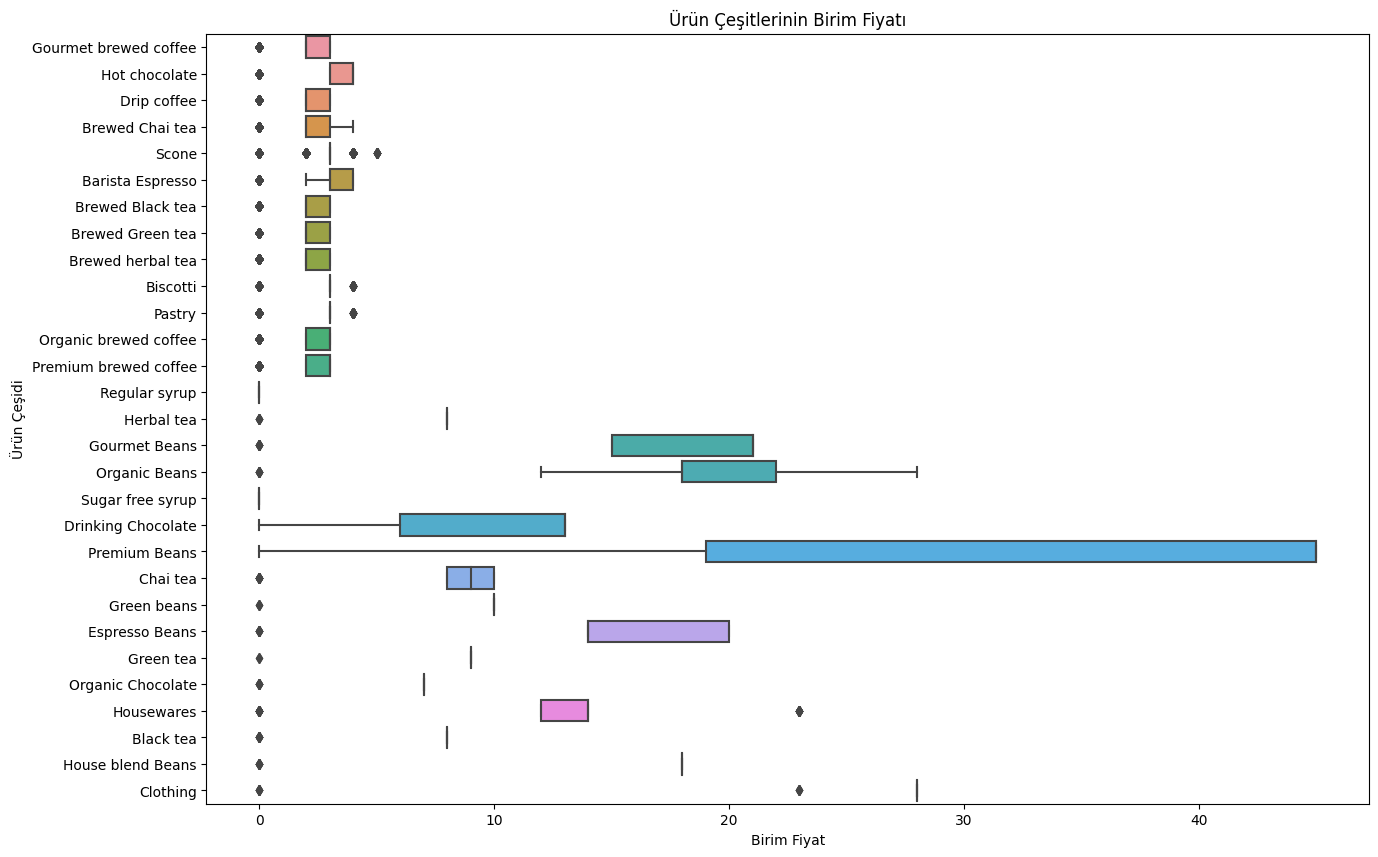

In [385]:
# Ürün çeşitlerinin birim fiyatlarını boxplot ile görselleştirelim.

plt.figure(figsize=(15, 10))
sns.boxplot(data = df_copy,
            x = "unit_price",
            y = "product_type");
plt.xlabel("Birim Fiyat")
plt.ylabel("Ürün Çeşidi")
plt.title("Ürün Çeşitlerinin Birim Fiyatı")

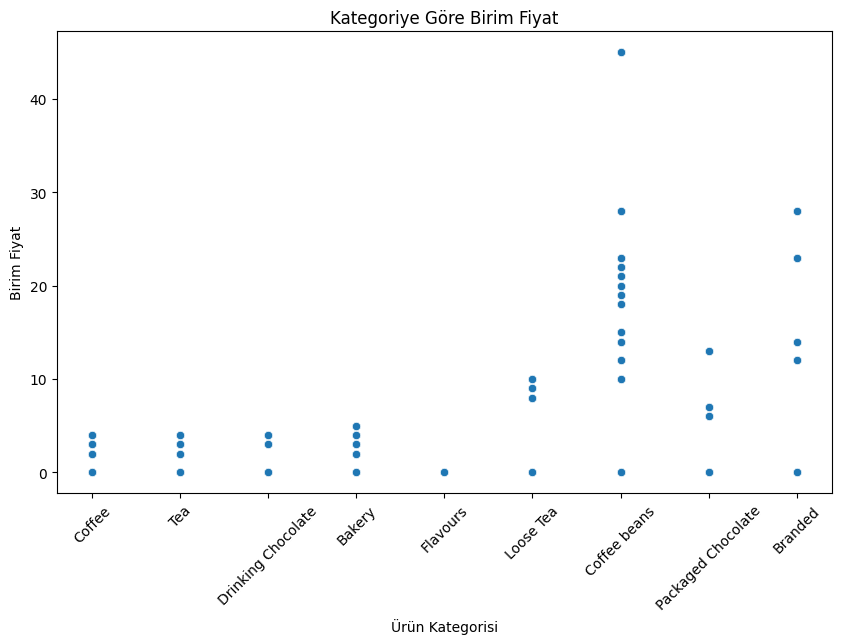

In [386]:
# Kategoriye göre Birim Fiyatları scatterplot ile görselleştirelim.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x="product_category", y="unit_price")
plt.title("Kategoriye Göre Birim Fiyat")
plt.xlabel("Ürün Kategorisi")
plt.ylabel("Birim Fiyat")
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Coffee'),
  Text(1, 0, 'Tea'),
  Text(2, 0, 'Drinking Chocolate'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Flavours'),
  Text(5, 0, 'Loose Tea'),
  Text(6, 0, 'Coffee beans'),
  Text(7, 0, 'Packaged Chocolate'),
  Text(8, 0, 'Branded')])

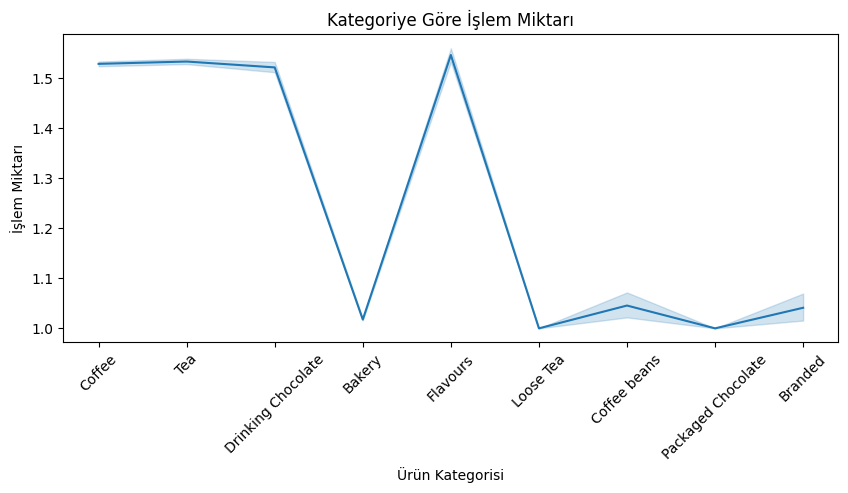

In [387]:
# Kategoriye göre işlem miktarını lineplot ile gösterelim.

plt.figure(figsize = (10, 4))
sns.lineplot(data = df,
             x = "product_category",
             y = "transaction_quantity");
plt.title("Kategoriye Göre İşlem Miktarı")
plt.xlabel("Ürün Kategorisi")
plt.ylabel("İşlem Miktarı")
plt.xticks(rotation=45)

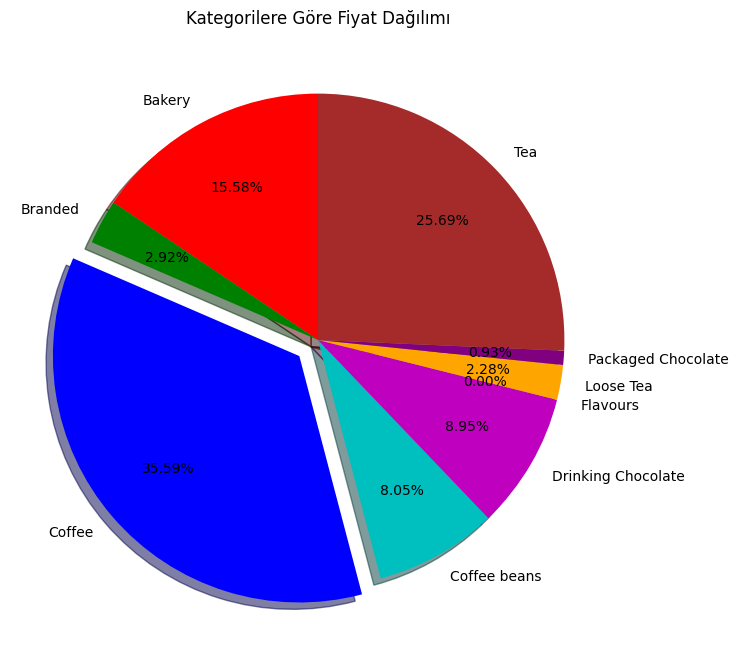

In [388]:
# Kategorilere göre fiyat dağılımını Pasta Grafiği üzerinde gösterelim

category_totals = df_copy.groupby("product_category")["unit_price"].sum()

# Pasta Grafiği
plt.figure(figsize=(8, 8))
plt.pie(
    category_totals,  # Değerler
    labels=category_totals.index,  # Etiketler
    autopct='%1.2f%%',  # Yüzdeler
    startangle=90,  # Başlangıç açısı
    explode=[0.1 if i == category_totals.idxmax() else 0 for i in category_totals.index],  # En büyük dilimi ayır
    colors = ["r", "g", "b", "c", "m", "y", "orange", "purple", "brown", "pink"],  # Renkler
    pctdistance=0.7,  # Yüzde mesafesi
    shadow=True  # Gölge
)
plt.title("Kategorilere Göre Fiyat Dağılımı")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


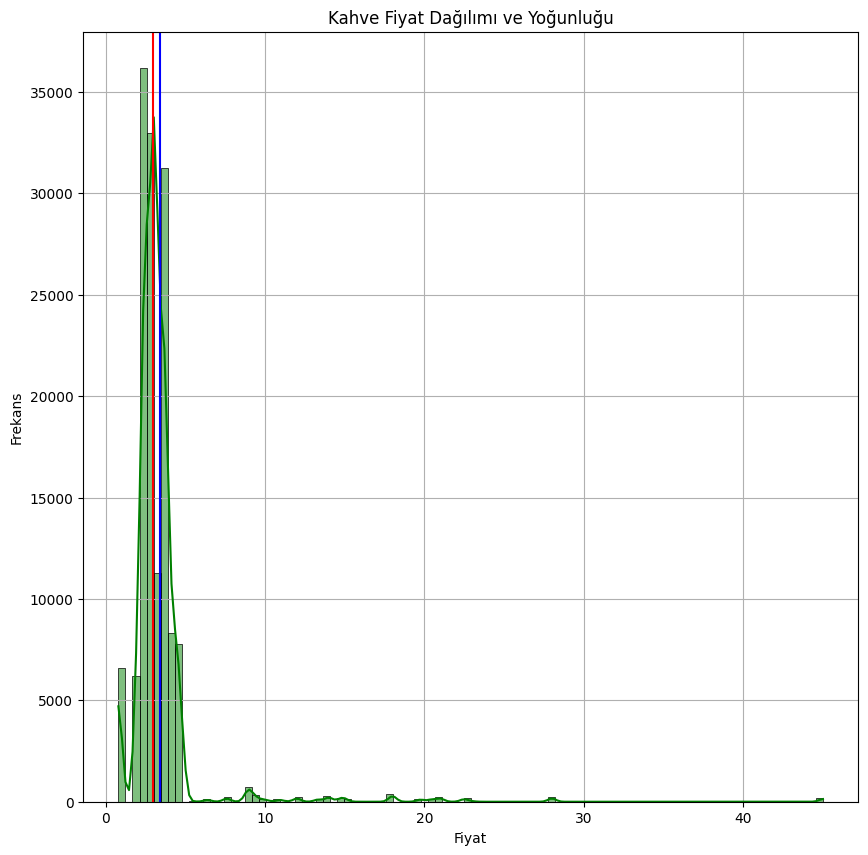

In [389]:
# Kahve fiyat dağılımı ve yoğunluğunu histogram ile görselleştirelim

plt.figure(figsize=(10,10))

sns.histplot(df["unit_price"], bins=100, kde=True, color="green")
plt.title("Kahve Fiyat Dağılımı ve Yoğunluğu")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.axvline(df["unit_price"].mean(), color="blue")                  # ortalamasını bulalım
plt.axvline(df["unit_price"].median(), color="red")               # median değerini bulalım
plt.grid()
plt.show()

<a id="6"><a> <br>
## *6. Feature Engineering*

In [391]:
# unit_price bazında segmentlere ayıralım, Fiyat_Segmenti isimli yeni bir sütun oluşturalım.

df_copy["Fiyat_Segmenti"] = np.where(df["unit_price"] > 3, np.where(df["unit_price"] > 14, "Yüksek Fiyat", "Orta Fiyat"), "Düşük Fiyat")

In [392]:
df_copy[df_copy["Fiyat_Segmenti"] == "Düşük Fiyat"].head(2)                  # sadece düşük fiyata sahip olan segmenti getirelim

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Fiyat_Segmenti
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3,Coffee,Gourmet brewed coffee,Ethiopia Rg,Düşük Fiyat
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Düşük Fiyat


In [393]:
sorted_fiyat = df_copy.sort_values(by="Fiyat_Segmenti", ascending=False)                         # fiyat segmentini azalan sıraya göre sıralayalım ve yeni bir atama işlemi gerçekleştirelim
sorted_fiyat.head(3)

,transaction_id,transaction_date,transaction_time,transaction_quantity,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Fiyat_Segmenti
137996,138333.0,2023-06-21,09:32:13,1.0,3.0,Astoria,7.0,19,Coffee beans,Premium Beans,Jamacian Coffee River,Yüksek Fiyat
40781,40888.0,2023-03-11,10:14:49,1.0,8.0,Hell's Kitchen,NaN,20,Coffee beans,Espresso Beans,Primo Espresso Roast,Yüksek Fiyat
68005,68175.0,2023-04-16,10:32:27,1.0,3.0,Astoria,5.0,15,Coffee beans,Gourmet Beans,Columbian Medium Roast,Yüksek Fiyat


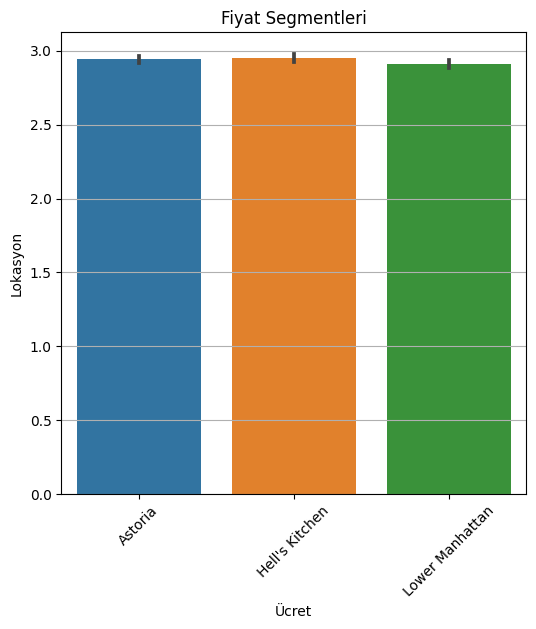

In [394]:
# fiyat segmentlerini bar plot ile görselleştirelim.

plt.figure(figsize=(6, 6))
sns.barplot(data = sorted_fiyat, x = "store_location", y = 'unit_price')
plt.title("Fiyat Segmentleri")
plt.xticks(rotation=45)
plt.xlabel("Ücret")
plt.ylabel("Lokasyon")
plt.grid(axis="y")

plt.show()